# Exploratory Analysis of Heart Data

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---
## Importing the dataset
The dataset is in CSV format; hence we use the read_csv function from Pandas to import it.

After importing, we take a quick look at the data using the head function.

In [ ]:
heartdata = pd.read_csv('clean_heart_data.csv')
heartdata.head()

,Unnamed: 0,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALCH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM,LOC,DIS
0,0,63.0,Male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,1,0,CL,0
1,1,67.0,Male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0,2,CL,1
2,2,67.0,Male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,2,1,CL,1
3,3,37.0,Male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,0,CL,0
4,4,41.0,Female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,0,CL,0


---

Checking the vital statistics of the dataset using the `type` and `shape` attributes.

In [ ]:
print("Data type : ", type(heartdata))
print("Data dims : ", heartdata.shape) 

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (303, 17)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
print(heartdata.dtypes)

Unnamed: 0      int64
AGE           float64
SEX            object
CP            float64
TRESTBPS      float64
CHOL          float64
FBS           float64
RESTECG       float64
THALCH        float64
EXANG         float64
OLDPEAK       float64
SLOPE         float64
CA            float64
THAL            int64
NUM             int64
LOC            object
DIS             int64
dtype: object


## Exploring the dataset

In [ ]:
# Information about the Variables and checking if there are any null values
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   AGE         303 non-null    float64
 2   SEX         303 non-null    object 
 3   CP          303 non-null    float64
 4   TRESTBPS    303 non-null    float64
 5   CHOL        303 non-null    float64
 6   FBS         303 non-null    float64
 7   RESTECG     303 non-null    float64
 8   THALCH      303 non-null    float64
 9   EXANG       303 non-null    float64
 10  OLDPEAK     303 non-null    float64
 11  SLOPE       303 non-null    float64
 12  CA          303 non-null    float64
 13  THAL        303 non-null    int64  
 14  NUM         303 non-null    int64  
 15  LOC         303 non-null    object 
 16  DIS         303 non-null    int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 40.4+ KB


## MultiVariable Statistics

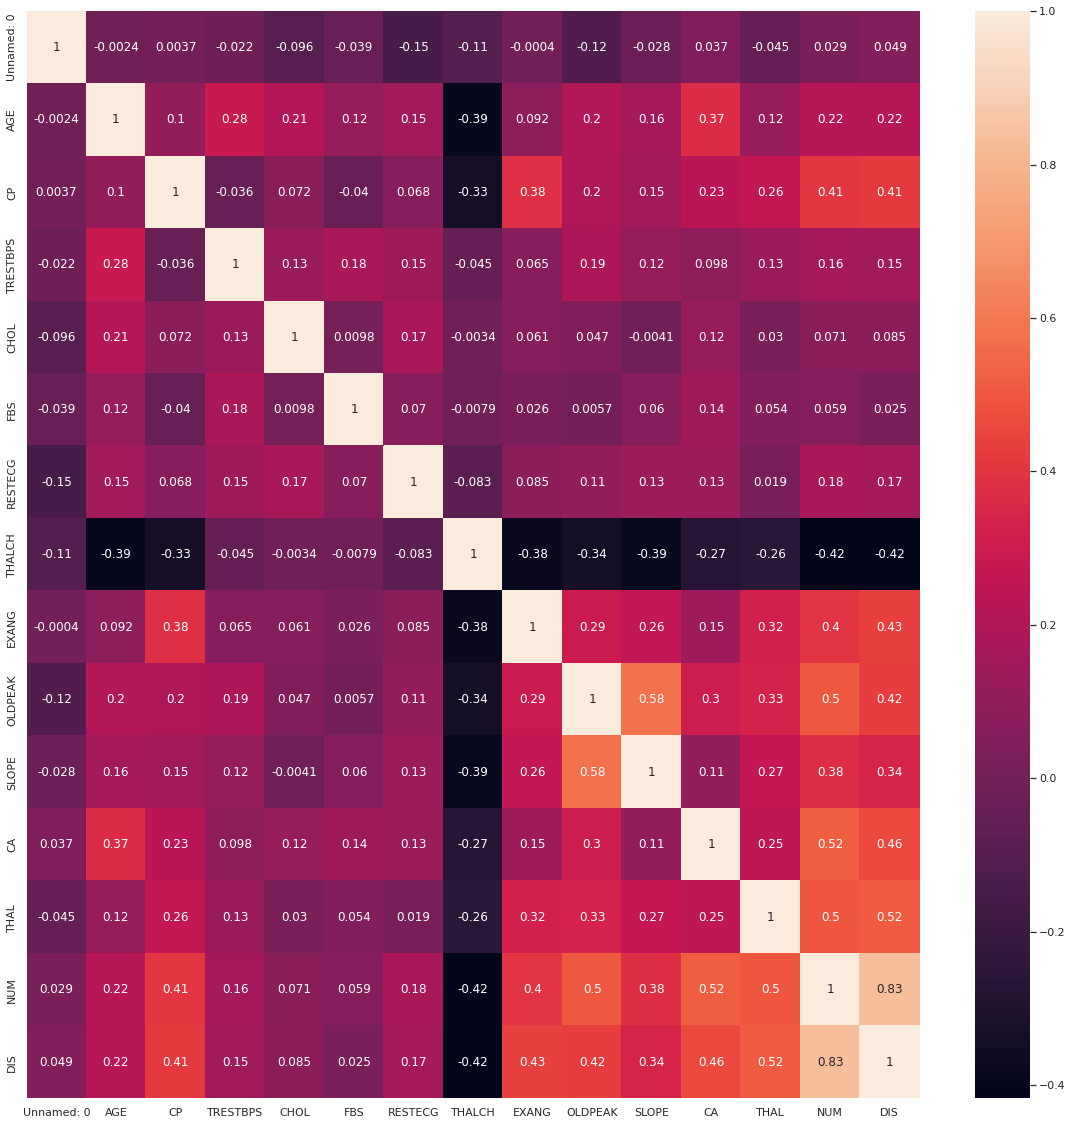

In [ ]:
#Correlation of all variables 
plt.figure(figsize = (20,20))
sb.heatmap(heartdata.corr(), annot = True)

In [ ]:
# Extracting only the numeric data variables 
dataDF = pd.DataFrame(heartdata[["AGE", "TRESTBPS", "CHOL", "THALCH", "OLDPEAK", "CA"]])
# Summary Statistics for all numeric Variables
dataDF.describe().round(2)

,AGE,TRESTBPS,CHOL,THALCH,OLDPEAK,CA
count,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,131.69,246.69,149.61,1.04,0.66
std,9.04,17.60,51.78,22.88,1.16,0.93
min,29.00,94.00,126.00,71.00,0.00,0.00
25%,48.00,120.00,211.00,133.50,0.00,0.00
50%,56.00,130.00,241.00,153.00,0.80,0.00
75%,61.00,140.00,275.00,166.00,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00


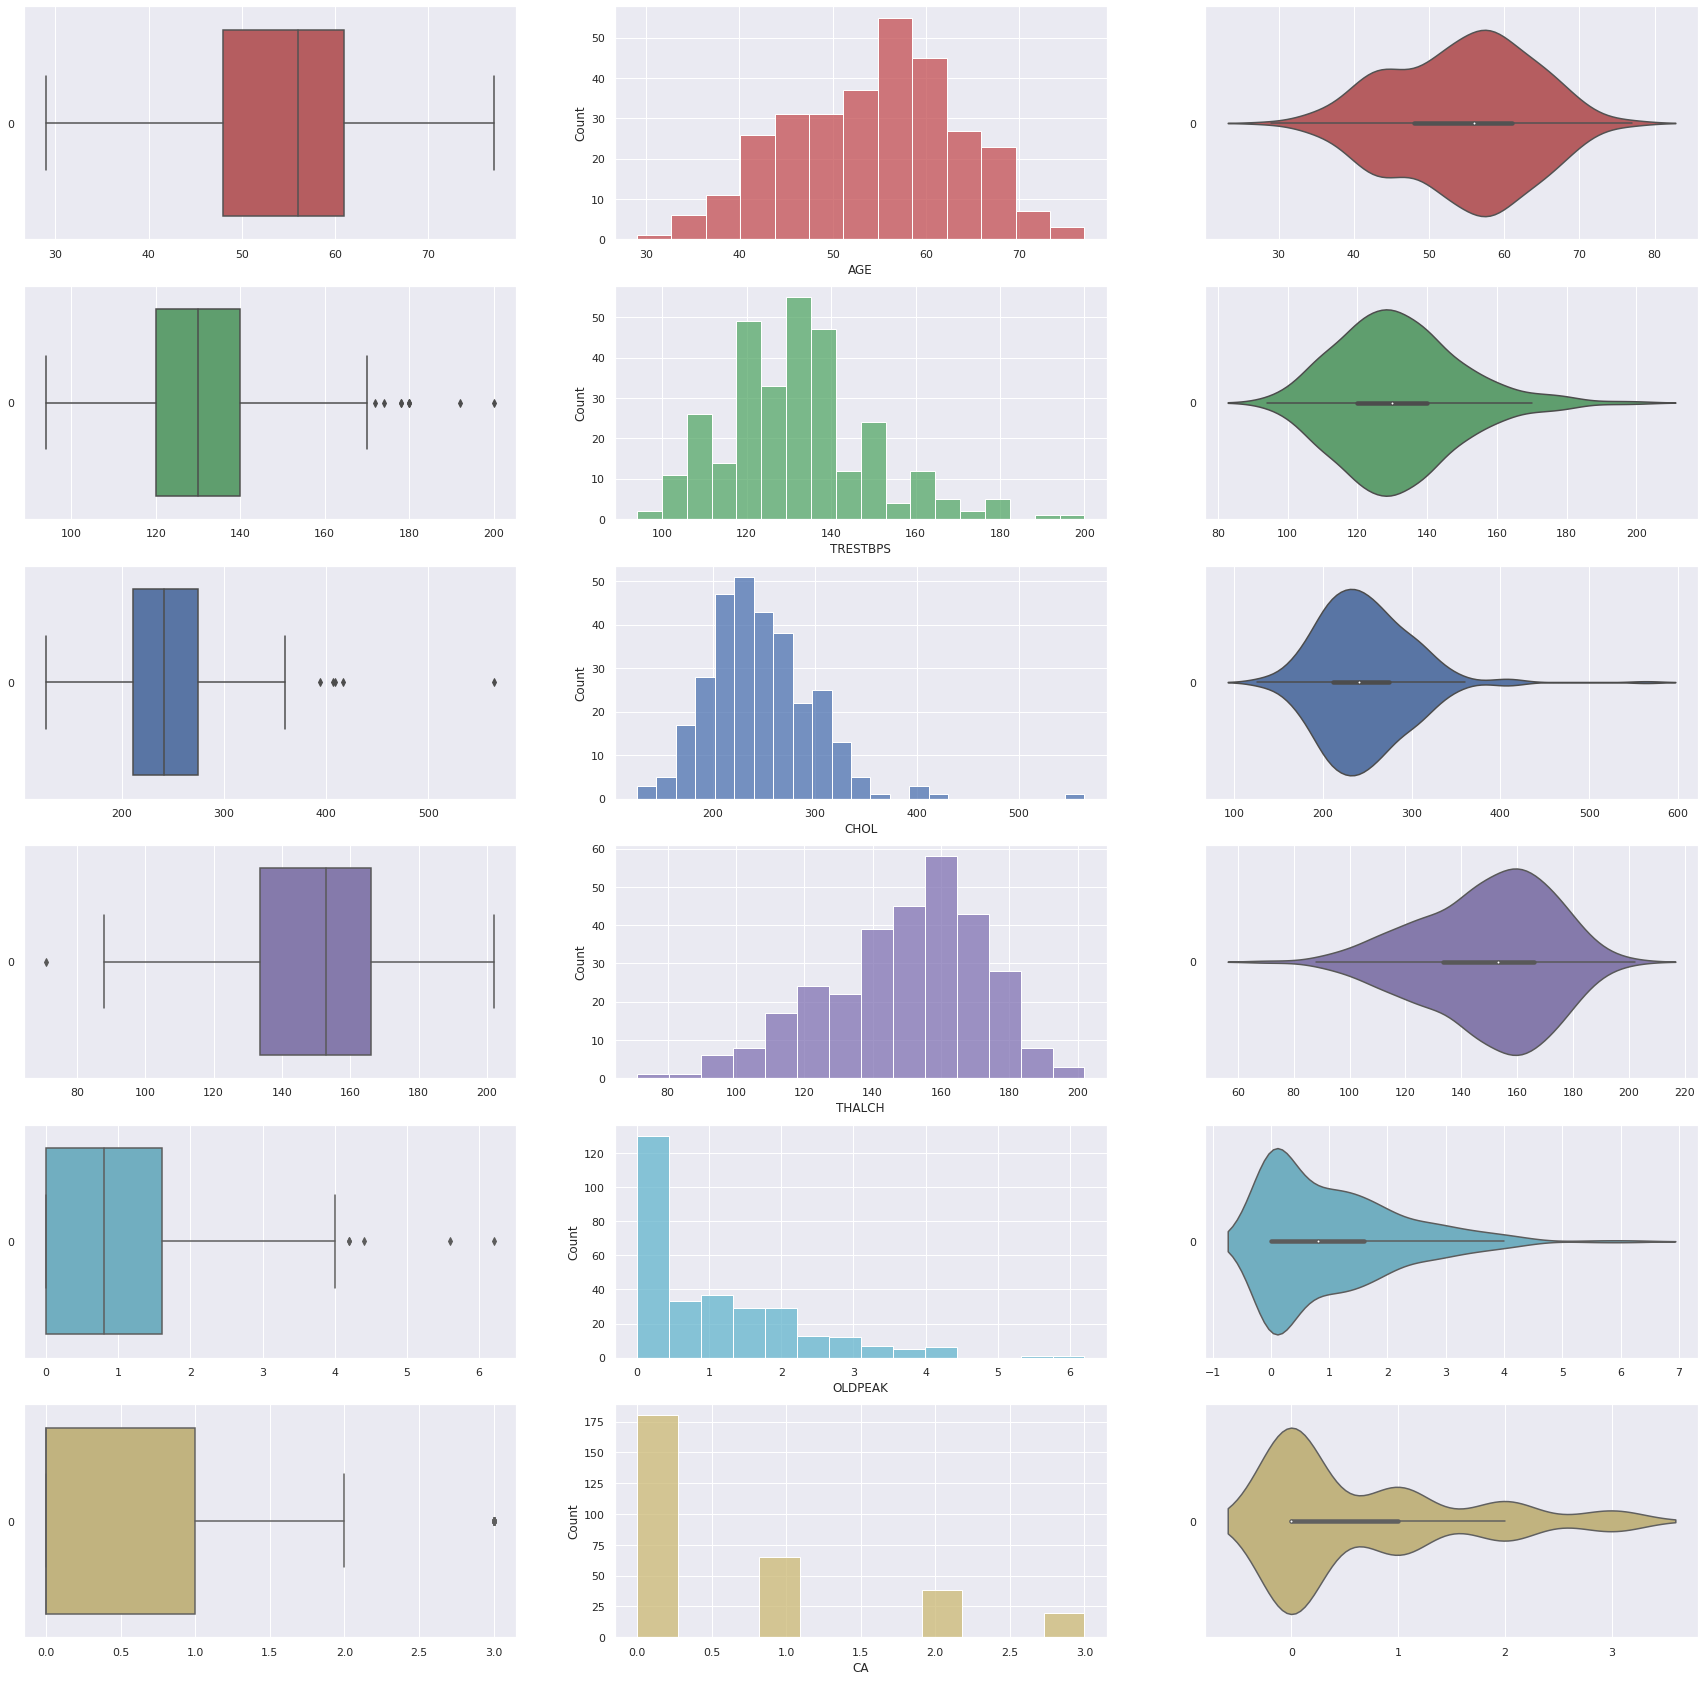

In [ ]:
# Drawing the distributions of all numerical variables
f, axes = plt.subplots(6, 3, figsize=(30, 30))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in dataDF:
    sb.boxplot(data = dataDF[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = dataDF[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data = dataDF[var], color = colors[count], orient = "h", ax = axes[count,2])
    count += 1

               AGE  TRESTBPS      CHOL    THALCH   OLDPEAK        CA
AGE       1.000000  0.284946  0.208950 -0.393806  0.203805  0.365323
TRESTBPS  0.284946  1.000000  0.130120 -0.045351  0.189171  0.097528
CHOL      0.208950  0.130120  1.000000 -0.003432  0.046564  0.123726
THALCH   -0.393806 -0.045351 -0.003432  1.000000 -0.343085 -0.265699
OLDPEAK   0.203805  0.189171  0.046564 -0.343085  1.000000  0.301067
CA        0.365323  0.097528  0.123726 -0.265699  0.301067  1.000000


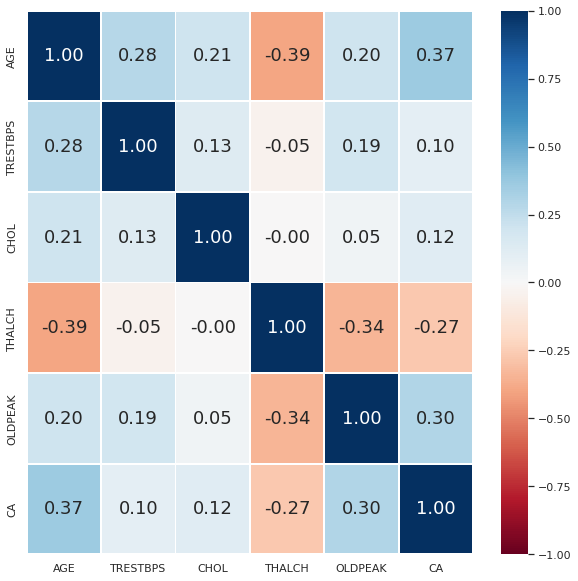

In [ ]:
# Correlation Matrix
print(dataDF.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(dataDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

###Conclusions regarding relationship between numerical variables

Relationships with correlations between +-0.1 and +-0.2: 
TRESTBPS & CHOL, TRESTBPS & OLDPEAK, TRESTBPS & CA, CHOL & CA

Relationships with correlations between +-0.2 & +_0.3: 
Age & TRESTBPS, AGE & CHOL, AGE & OLDPEAK, OLDPEAK & CA, THALCH & CA, 

Relationships with correlations between +-0.3 & +-0.4:
AGE & THALCH, AGE & CA, THALCH & OLDPEAK



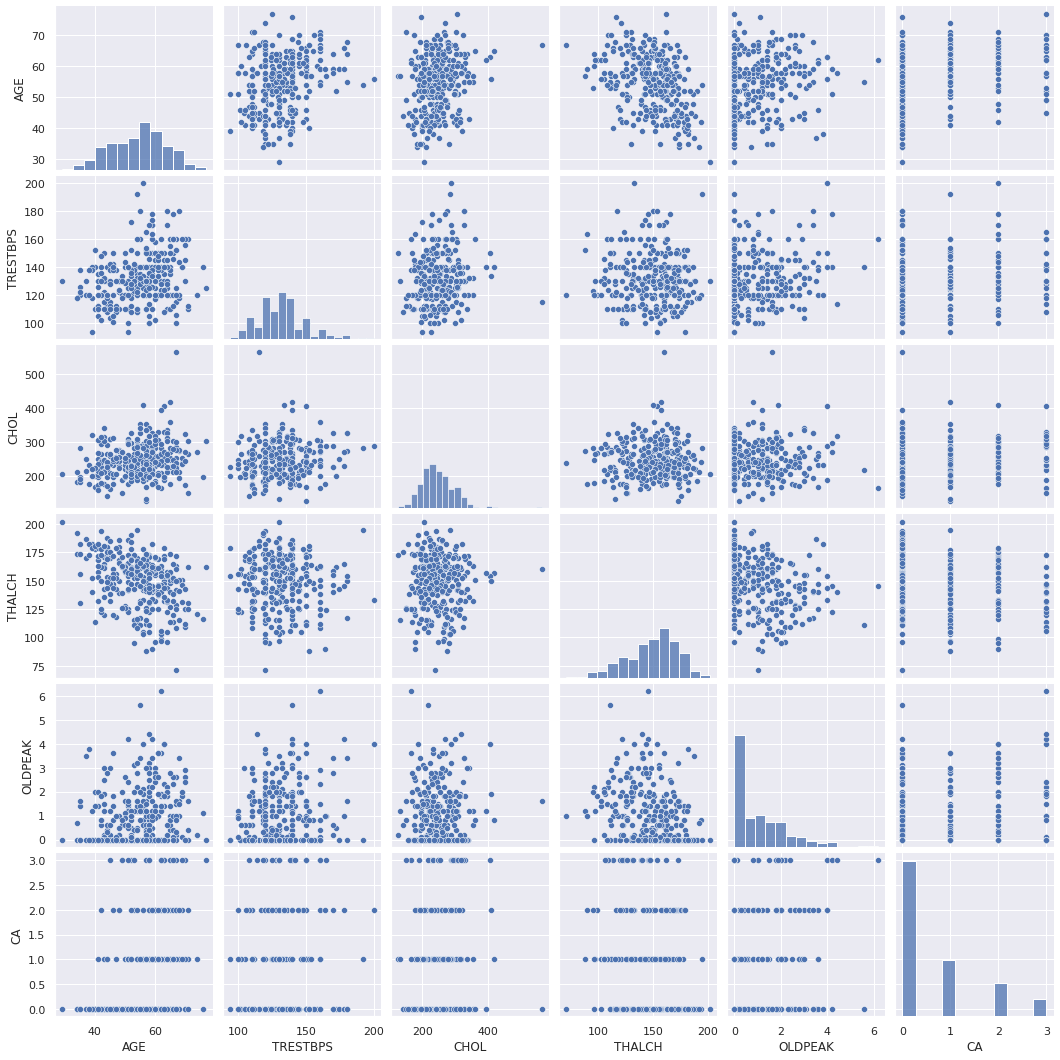

In [ ]:
# Drawing pairs of numerical variables against one another
sb.pairplot(data = dataDF)

###Exploration of Age and DIS/NUM


Age : 41


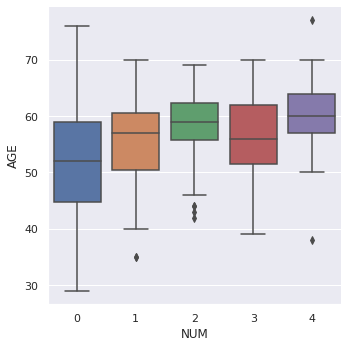

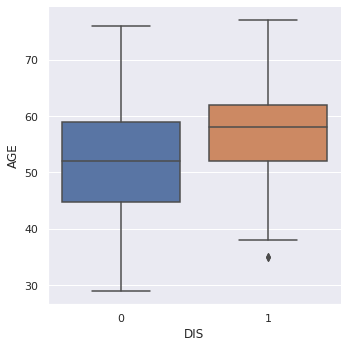

In [ ]:
print("Age :", len(heartdata["AGE"].unique()))

sb.catplot(x = "NUM", y = "AGE", data = heartdata , kind = "box")
sb.catplot(x = "DIS", y = "AGE", data = heartdata , kind = "box")


In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'AGE', data = heartdata)

The mean age for DIS = 1 is higher than for DIS = 0. This shows a positive relationship between higher age and incidence of heart disease.

The mean age for num>0 is higher for 1, 2 and 3 compared to the mean age for num = 0.

Higher age is associated with increased prevalence of heart disease as aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease.

###Exploration of TRESTBPS and DIS


Resting blood pressure(TRESTBPS) : 50


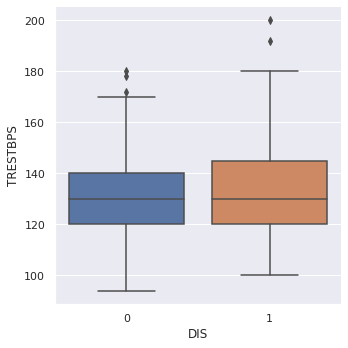

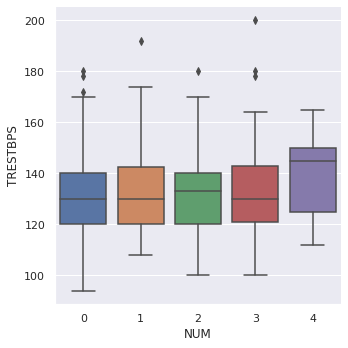

In [ ]:
print("Resting blood pressure(TRESTBPS) :", len(heartdata["TRESTBPS"].unique()))

sb.catplot(x='DIS', y='TRESTBPS', data=heartdata, kind='box');
sb.catplot(x='NUM', y='TRESTBPS', data=heartdata, kind='box');

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'TRESTBPS', data = heartdata)

From the barplot, the mean BP is highest for NUM = 4. There is a greater spread for BP when NUM = 0 compared to when NUM = 1,2,3,4.

TRESTBPS is the resting blood pressure of patients upon admission to hospital and so is expected to be higher in patients who have a heart disease because high blood pressure increases the risk of heart disease.


### Exploration of CHOL and DIS

Serum Cholesterol mg/dl(CHOL) and angiographic heart disease distribution


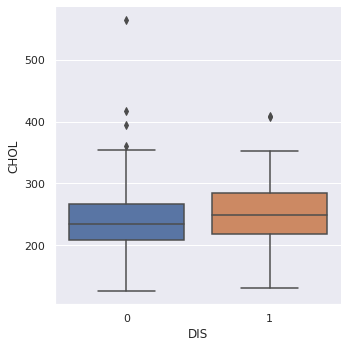

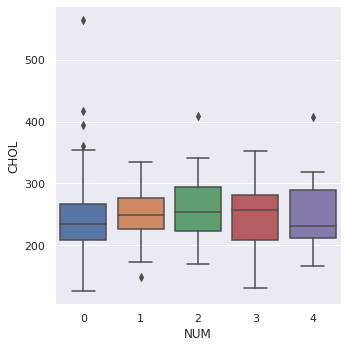

In [ ]:
print("Serum Cholesterol mg/dl(CHOL) and angiographic heart disease distribution")

sb.catplot(x='DIS', y='CHOL', data=heartdata, kind='box')
sb.catplot(x='NUM', y='CHOL', data=heartdata, kind='box')

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'CHOL', data = heartdata)

Mean cholesterol levels are slightly higher for DIS = 1 than for DIS = 0.

Generally, higher cholesterol increases the risk of heart disease. With high cholesterol, fatty deposits can develop in blood vessels and eventually when these deposits grow, it gets difficult for enough blood to flow through the arteries in the heart.

###Exploration of THALCH and DIS

Maximum heart rate achieved and angiographic heart disease distribution


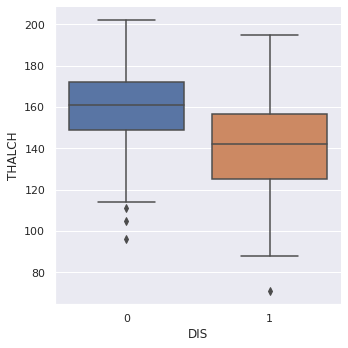

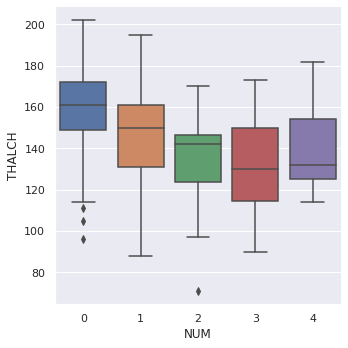

In [ ]:
print("Maximum heart rate achieved and angiographic heart disease distribution")

sb.catplot(x='DIS', y='THALCH', data=heartdata, kind='box');
sb.catplot(x='NUM', y='THALCH', data=heartdata, kind='box');

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'THALCH', data = heartdata)

Mean THALCH generally decreases as NUM increases with NUM=4. Mean THALCH for DIS = 1 is also lower than mean THALCH for DIS = 0.

THALCH is the maximum heartrate achieved by the patient presumably during a stress test. When there is a heart disease, maximum heart rate achieved would be lower because the fitness of the patient's heart would be lower and hence would not be able to achieve a higher rate. 

### Exploration of OLDPEAK and DIS

OLDPEAK(ST depression induced by exercise relative to rest) and angiographic heart disease distribution


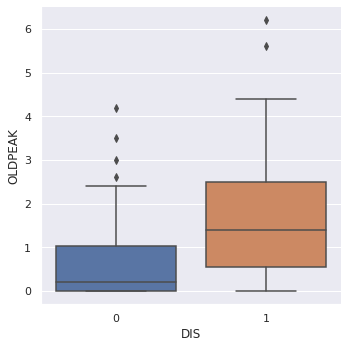

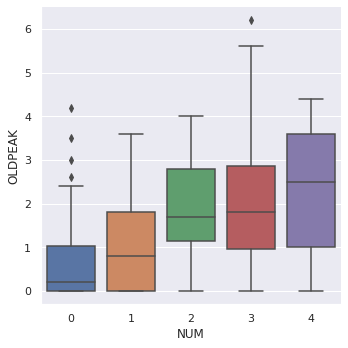

In [ ]:
print("OLDPEAK(ST depression induced by exercise relative to rest) and angiographic heart disease distribution")

sb.catplot(x='DIS', y='OLDPEAK', data=heartdata, kind='box');
sb.catplot(x='NUM', y='OLDPEAK', data=heartdata, kind='box');

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'OLDPEAK', data = heartdata)

Mean, 1st and 3rd quartiles of OLDPEAK are all higher for DIS = 1 than for DIS = 0.

Generally, mean OLDPEAK increases with increasing NUM.

A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Such ST-depressions are a common electrocardiographic sign of myocardial ischemia (heart disease) during exercise testing. Therefore a higher ST depression induced by exercise relative to rest would be a sign of heart disease and so OLDPEAK (ST depression induced by exericise relative to rest) would be higher for individuals with heart disease.

###Exploration of CA and DIS

CA : 4
0.0    180
1.0     65
2.0     38
3.0     20
Name: CA, dtype: int64


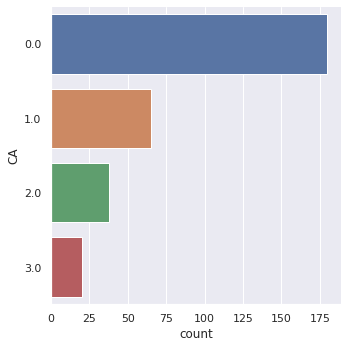

In [ ]:
print("CA(number of major vessels coloured by flourosopy) and angiographic heart disease distribution")

sb.catplot(x='DIS', y='CA', data=heartdata, kind='box', );
sb.catplot(x='NUM', y='CA', data=heartdata, kind='box', );

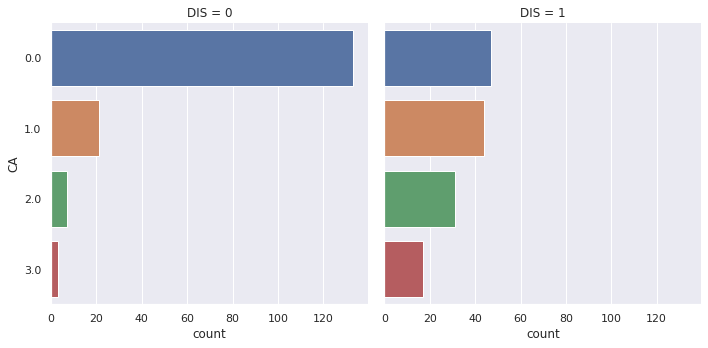

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'DIS', y = 'CA', data = heartdata)

Counts of CA = 1, 2, 3 are higher for DIS = 1 than for DIS = 0. 

CA is the number of major vessels coloured by fluoroscopy and vessels are coloured by fluroscopy when there are blockages present. Therefore a coloured vessel would be an indicator of heart disease. This explains why CA = 1,2 and 3 are higher when DIS = 1 (heart disease is present) compared to when DIS = 0 (heart disease is absent).

In [ ]:
catDF = pd.DataFrame(heartdata[["SEX", "CP", "FBS", "RESTECG", "EXANG", "SLOPE", "THAL", "DIS"]])
catDF.head()

,SEX,CP,FBS,RESTECG,EXANG,SLOPE,THAL,DIS,CA
0,Male,1.0,1.0,2.0,0.0,3.0,1,0,0.0
1,Male,4.0,0.0,2.0,1.0,2.0,0,1,3.0
2,Male,4.0,0.0,2.0,1.0,2.0,2,1,2.0
3,Male,3.0,0.0,0.0,0.0,3.0,0,0,0.0
4,Female,2.0,0.0,2.0,0.0,1.0,0,0,0.0


### Distribution of the response variable DIS 

Angiographic disease status : 2
0    164
1    139
Name: DIS, dtype: int64


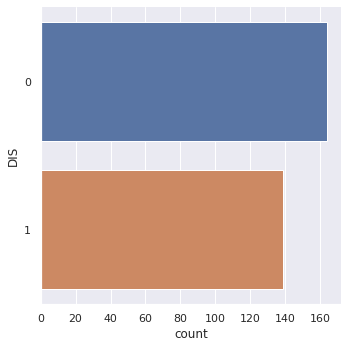

In [ ]:
print("Angiographic disease status :", len(catDF["DIS"].unique()))

print(catDF["DIS"].value_counts())
sb.catplot(y = "DIS", data = catDF, kind = "count")

### EXPLORATION OF SEX AND DIS

Gender of the individual : 2
Male      206
Female     97
Name: SEX, dtype: int64


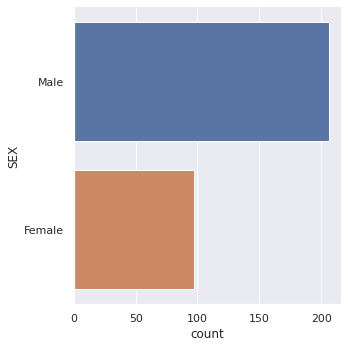

In [ ]:
print("Gender of the individual :", len(catDF["SEX"].unique()))

print(catDF["SEX"].value_counts())
sb.catplot(y = "SEX", data = catDF, kind = "count")

Key: 
 Male = 1
 Female = 0




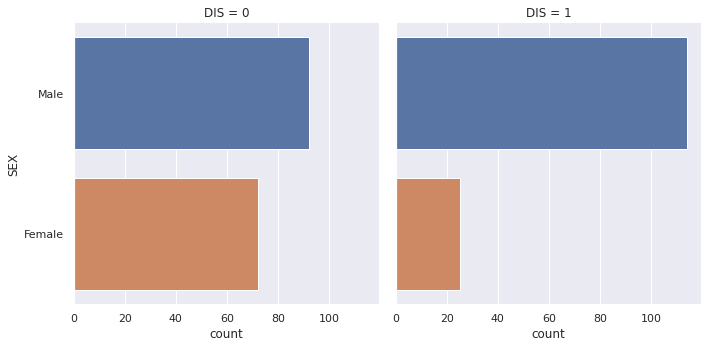

In [ ]:
# Sex of the individual over Angiographic disease status
print("Key: \n", "Male = 1\n" , "Female = 0")
print("\n")

sb.catplot(y = 'SEX', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

There seems to be a greater incidence of heart disease in men than in women as seen by the length of the bar for males with disease being 3 times higher than that of women with disease.

This trend is consistent with studies which suggest that cardiovascular disease is known to be higher in men than in women of similar age. This gender difference is more prominent at a younger age. (https://gh.bmj.com/content/2/2/e000298) 






### EXPLORATION OF CP AND DIS

Chest pain type : 4


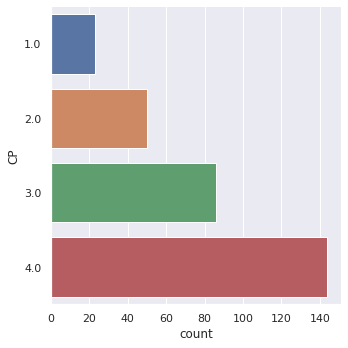

In [ ]:
print("Chest pain type :", len(catDF["CP"].unique()))

sb.catplot(y = "CP", data = catDF, kind = "count")

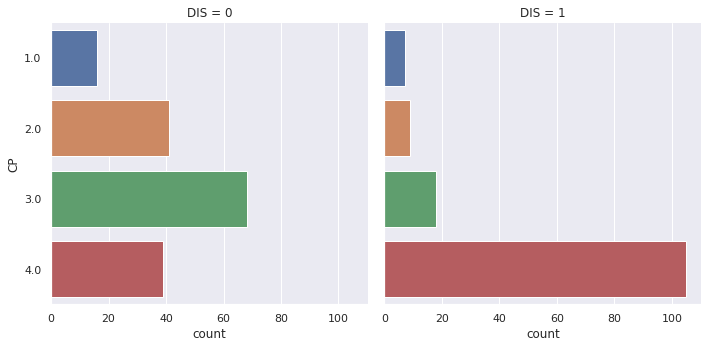

In [ ]:
# Chest pain type over Angiographic disease status
sb.catplot(y = 'CP', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

When DIS = 1, CP = 4 is greatest. CP measures the type of chest pain with: 

*   1 meaning typical angina
*   2 meaning atypical angina 
*   3 meaning non-anginal pain 
*   4 meaning asymptomatic

Angina is chest pain caused by reduced blood flow to the heart muscles which usually occurs as a result of heart disease but can be caused by other health conditions as well such as severe anaemia. 

Most of the heart disease patients in our dataset are found to have asymptomatic chest pain (CP=4 for DIS = 1).

### EXPLORATION OF FBS AND DIS

Fasting blood sugar : 2
0.0    258
1.0     45
Name: FBS, dtype: int64


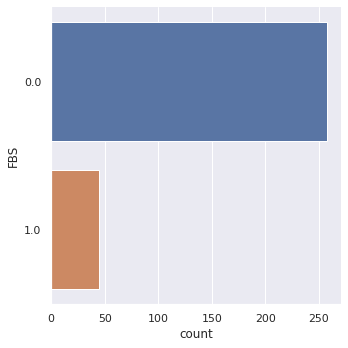

In [ ]:
print("Fasting blood sugar :", len(catDF["FBS"].unique()))

print(catDF["FBS"].value_counts())
sb.catplot(y = "FBS", data = catDF, kind = "count")

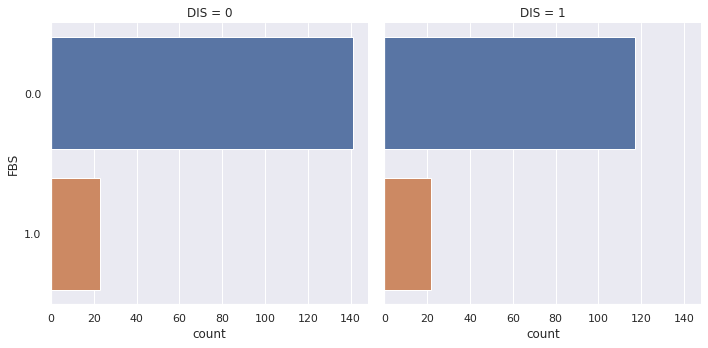

In [ ]:
# Fasting blood sugar of the individual over Angiographic disease status
sb.catplot(y = 'FBS', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

FBS is the fasting blood sugar and a  fasting blood sugar higher than 120 mg/dl (FBS =1) would indicate diabetes. Diabetes increases the risk of heart diease. 

According to the data, there are lesser patients without diabetes but with heart disease (FBS = 0, DIS = 1) compared to patients without diabtes and without heart disease(FBS = 0, DIS = 0). As we expected to see more people with FBS = 1 for DIS = 1 than for DIS = 0, this is an anomaly in the dataset.

### EXPLORATION OF RESTECG AND DIS

Resting electrocardiographic results : 3
0.0    151
2.0    148
1.0      4
Name: RESTECG, dtype: int64


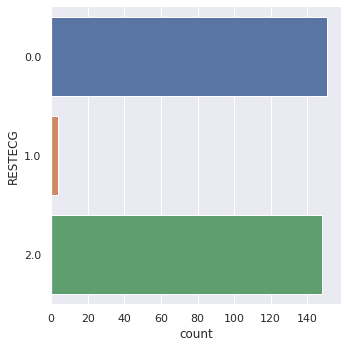

In [ ]:
print("Resting electrocardiographic results :", len(catDF["RESTECG"].unique()))

print(catDF["RESTECG"].value_counts())
sb.catplot(y = "RESTECG", data = catDF, kind = "count")

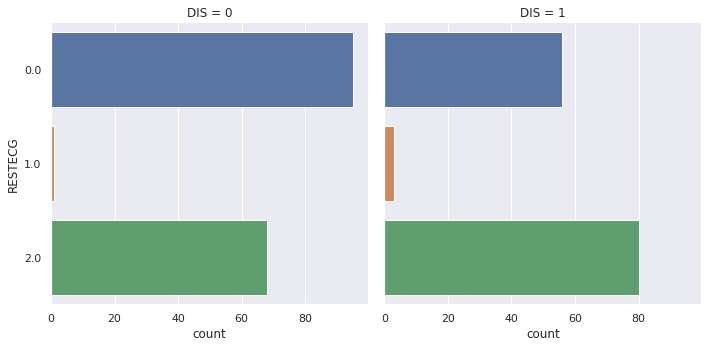

In [ ]:
# Resting electrocardiographic results of the individual over Angiographic disease status
sb.catplot(y = 'RESTECG', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

RESTECG = 2 is greater for DIS = 1 than DIS = 0 while RESTECG = 1 is lesser for DIS = 1 than for DIS = 0. This indicates a positive correlation. There could be a positive relationship between RESTECG and presence of angiographic disease.

RESTECG is the resting electrocardiographic results where:

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Value 1 and 2 are abnormalities which indicate heart disease.
This is consistent with the data as RESTECG = 1 and RESTECG = 2 are higher when DIS = 1 than when DIS = 0.

### EXPLORATION OF EXANG AND DIS

Exercise induced angina : 2
0.0    204
1.0     99
Name: EXANG, dtype: int64


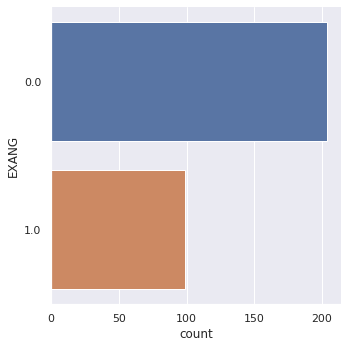

In [ ]:
print("Exercise induced angina :", len(catDF["EXANG"].unique()))

print(catDF["EXANG"].value_counts())
sb.catplot(y = "EXANG", data = catDF, kind = "count")

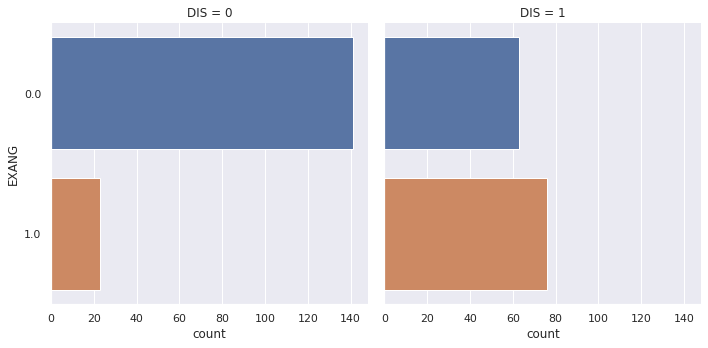

In [ ]:
# Exercise induced angina results of the individual over Angiographic disease status
sb.catplot(y = 'EXANG', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

Occurences of EXANG (Exercise induced Angina) is about 4x greater where angiographic disease is present compared when angiographic disease is absent. 

There seems to be a positive relaitonship between exercise induced angina and prescence of angiographic disease.

Stable angina is usually triggered by physical activity. During exercise, the heart demands more blood, but narrowed arteries slow down blood flow therefore causing chest pain (angina).


### EXPLORATION OF SLOPE AND DIS

Slope of the peak exercise ST segment : 3
1.0    142
2.0    140
3.0     21
Name: SLOPE, dtype: int64


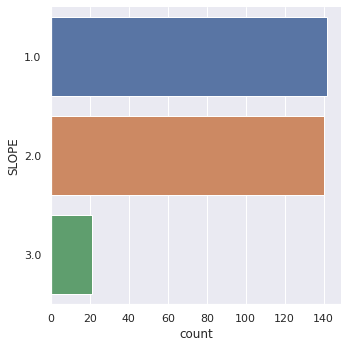

In [ ]:
print("Slope of the peak exercise ST segment :", len(catDF["SLOPE"].unique()))

print(catDF["SLOPE"].value_counts())
sb.catplot(y = "SLOPE", data = catDF, kind = "count")

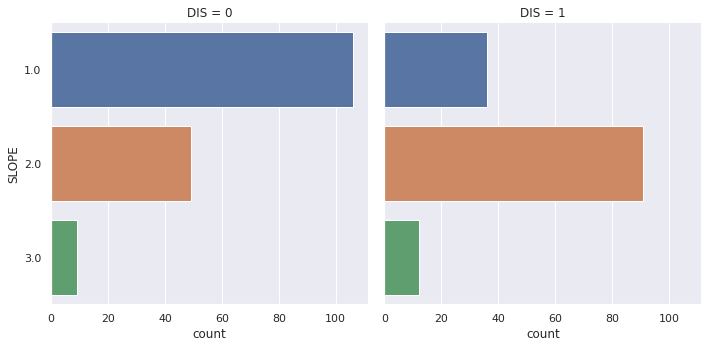

In [ ]:
# Slope of the peak exercise ST segment over Angiographic disease status
sb.catplot(y = 'SLOPE', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

For individuals with no angiographic disease (DIS = 0), greatest count is for SLOPE = 1 (upsloping) while SLOPE = 2 (flat) is greatest for those with angiographic disease(DIS=1).

This is because the normal slope of the peak exercise ST-segment is supposed to be upwards while the standard criterion for an abnormal ST segment response is horizontal (planar) or downsloping depression of >1 mm. 

### Exploration of THAL and DIS

Heart defect types : 3
0    168
2    117
1     18
Name: THAL, dtype: int64


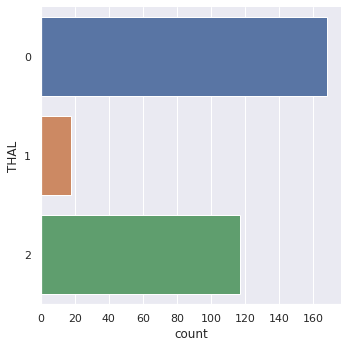

In [ ]:
print("Heart defect types :", len(catDF["THAL"].unique()))

print(catDF["THAL"].value_counts())
sb.catplot(y = "THAL", data = catDF, kind = "count")

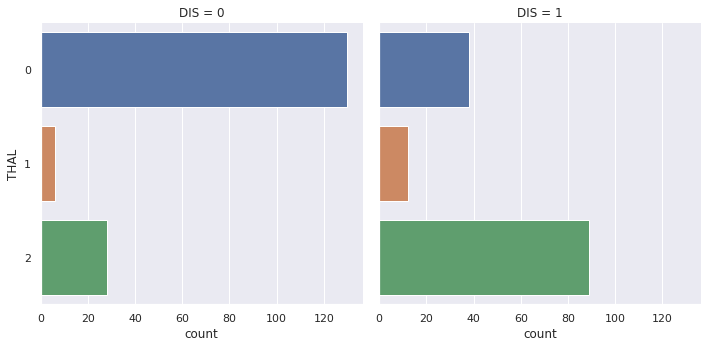

In [ ]:
# Slope of the peak exercise ST segment over Angiographic disease status
sb.catplot(y = 'THAL', data = catDF, col = 'DIS', kind = 'count', col_wrap = 2, height = 5)

Most individuals with no angiographic disease(DIS=0), have no heart defect(THAL=0) while most individuals with angiographic disease(DIS=1) have reversible defect(THAL=2).

This is because heart defects both fixed(THAL=1) and reverisble(THAL=2) are associated with angiographic disease and so those with angigraphic disease are expected to have some form of heart defects whereas those without any angiographic disease would also have a normal heart without any defects(THAL=0). 


### EXLORING CONNECTION BETWEEN THREE VARIABLES USING HEATMAP

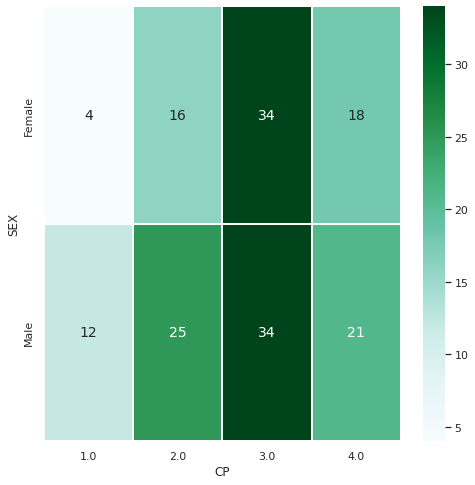

In [ ]:
f = plt.figure(figsize=(8, 8))

dualtype_gen1 = catDF[catDF["DIS"] == 0]

sb.heatmap(dualtype_gen1.groupby(['SEX', 'CP']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

CP = 3 (non-anginal pain) is the highest type of chest pain in both males and females without angiographic disease. 

Non-anginal pain suggests that the chest pain had occurred due to other reasons such as gastric or muscle tensions rather than due to the heart not receiving enough oxygen (pain due to heart not receiving enough oxygen is known as anginal pain). Since the pain is not anginal, the patients would not have heart disease. 

Since males are more likely to have heart disease, the row of boxes in the heatmap for males are darker than those for females 

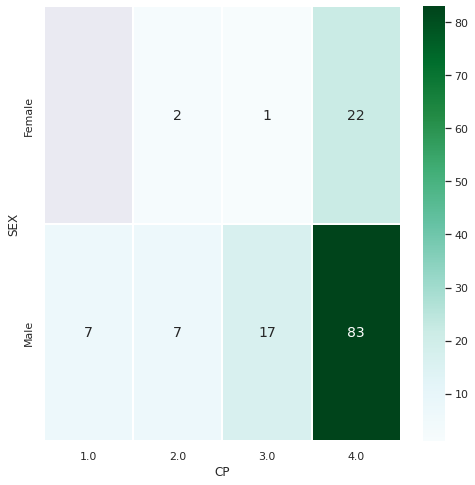

In [ ]:
f = plt.figure(figsize=(8, 8))

dualtype_gen2 = catDF[catDF["DIS"] == 1]

sb.heatmap(dualtype_gen2.groupby(['SEX', 'CP']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most males and females with angiographic disease have chest pain type 4 (asymptomatic) in this dataset.

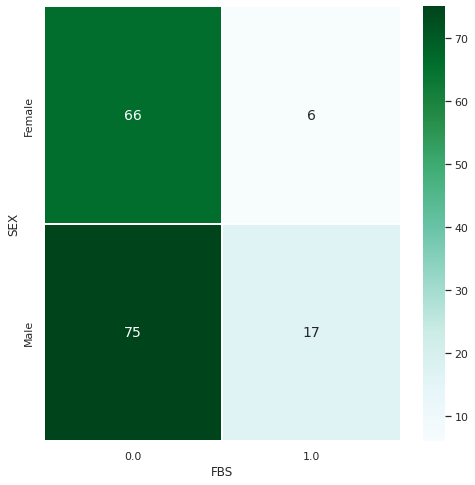

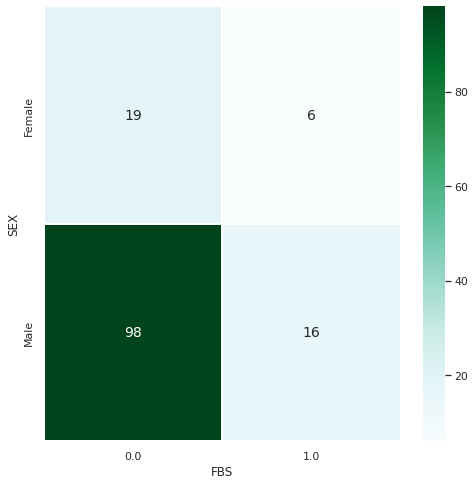

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['SEX', 'FBS']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['SEX', 'FBS']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

There is no obvious link between FBS and DIS in this dataset as count for FBS = 0 is higher in both males and females for both DIS = 0 and DIS = 1. However, this is an anomaly because FBS = 1 is an indicator of diabetes and diabetes increases risk of heart disease and so FBS = 1 than FBS = 0 is expected to be higher when DIS = 1 but contrarily, FBS = 0 is higher 

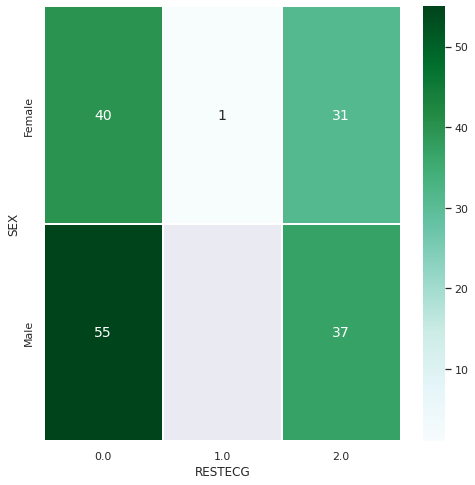

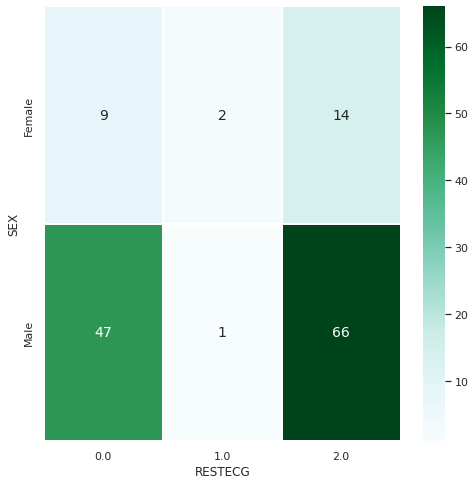

In [ ]:
f = plt.figure(figsize=(8, 8))

sb.heatmap(dualtype_gen1.groupby(['SEX', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['SEX', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

There is a greater proportion of those without heart disease having RESTECG = 0 because RESTECG = 0 stands for normal ECG while RESTECG 1 and 2 stand for abnormal ECG's. 
Greater proportion of those with heart disease (DIS = 1) have RESTECG = 2, which is an abnormal ECG. 
Since males are more likely to get heart disease, more males have RESTECG = 1 and 2 (66) as compared to females (16) for DIS = 1(individuals with heart disease)

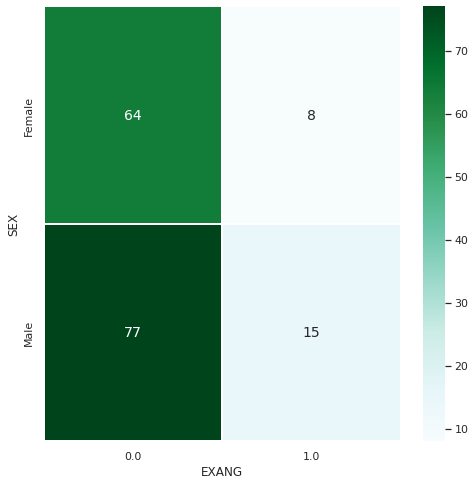

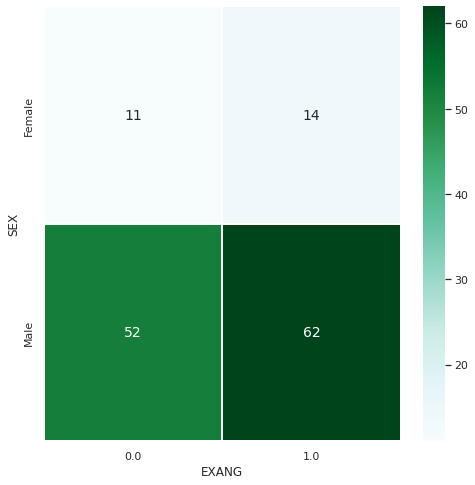

In [ ]:
f = plt.figure(figsize=(8, 8))

sb.heatmap(dualtype_gen1.groupby(['SEX', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['SEX', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS = 0(no heart disease), EXANG = 0 is more prevalent in both males and females because EXANG = 0 means no exercise induced angina and exercise induced angina(chest pain) is an indicator of heart diease as it means that the heart is not receiving enough blood to meet the energy demands from the exercise, probably due to clogged arteries or other heart issues.

For DIS = 1, there are more males than females as males are more likely to get heart disease. 
Next, for both males and females, EXANG = 1(presence of exercise induced angina) is higher than EXANG = 0(no exercise induced angina)because when heart disease is present execise causes chest pain due to reasons explained previously.

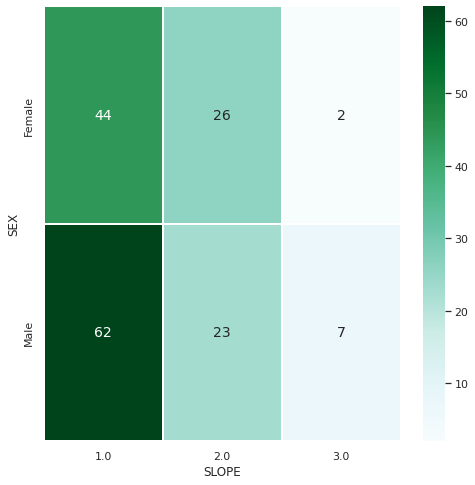

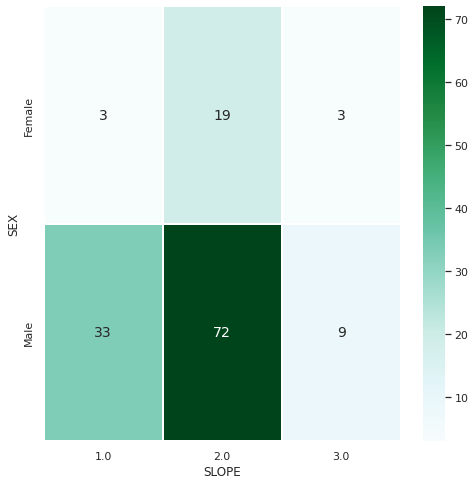

In [ ]:
f = plt.figure(figsize=(8, 8))

sb.heatmap(dualtype_gen1.groupby(['SEX', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['SEX', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS = 0(no heart disease), 
most males and females have Slope = 1(upwards sloping ST-segment when exercising) because upwards sloping during exercise is normal. 

For DIS = 1(have heart disease),
firstly there is a greater proportion of males than females because as explained earlier males tend to have a higher risk of having heart disease than females. 
Secondly, there is higher proportion of both males and females with Slope = 2 (flat/abnormal) compared to Slope = 1(upwards/normal) and slope = 3(downwards/abnormal). 
However, there is an unexpectedly large number of males with a normal(slope = 1) slope but have heart disease. This could be because as seen from the bar chart below, when NUM=1(mild heart disease) SLOPE = 1 is quite prevalent probably because the heart disease is still too mild for the slope to behave abnormally. 



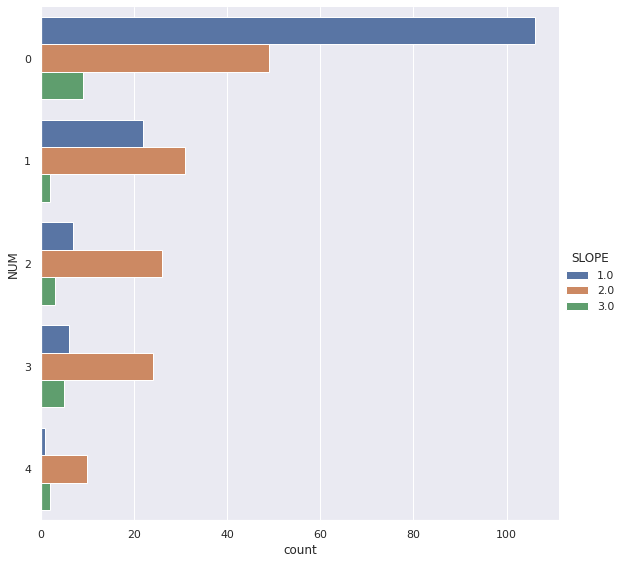

In [ ]:
sb.catplot(y="NUM", hue = 'SLOPE', kind="count", data=heartdata, height = 8)

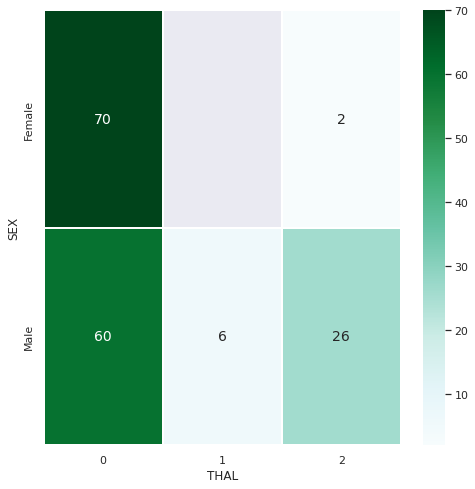

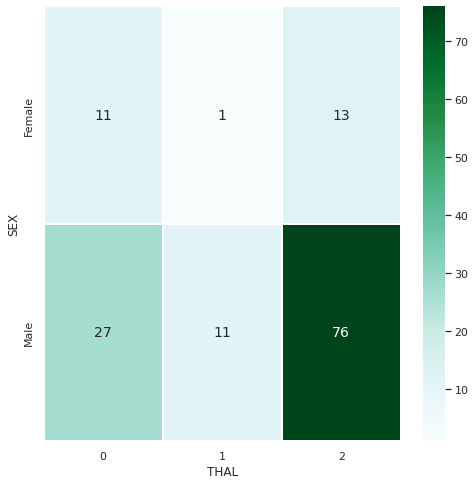

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['SEX', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['SEX', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS = 0(no heart disease), 
most males and females have no heart defects(THAL=0).

For DIS = 1(have heart disease),
firstly there is a greater proportion of males than females because as explained earlier males tend to have a higher risk of having heart disease than females. Most males and females have reversible heart defects(THAL=2). 


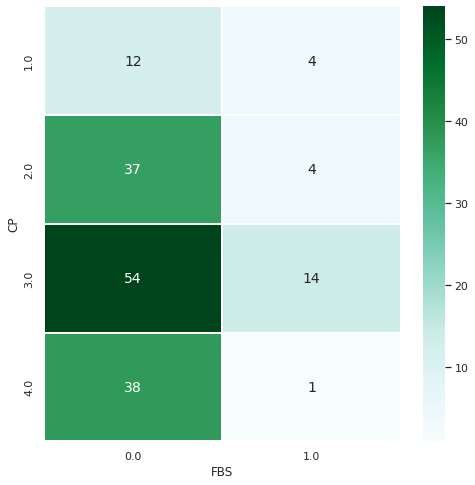

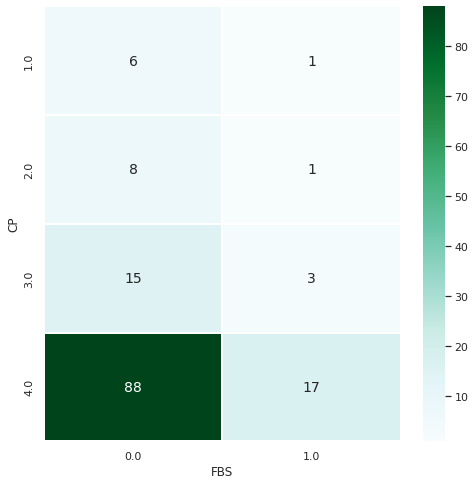

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['CP', 'FBS']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['CP', 'FBS']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS = 0, 

there are more people with FBS =0(fasting blood sugar less than 120 mg/dl) than FBS = 1(fasting blood sugar more than 120 mg/dl) because if fasting blood sugar is lower than 120 mg/dl the patients are likely to be non-diabetic and since diabetes increases risk of heart diease, a greater proportion of those without heart disease have fbs less than 120 (FBS = 0). 

CP = 3, non anginal pain, is the most popular for DIS = 0 and for FBS = 0 because it means the chest pain was due to other factors pertaining to gastric or musculo-skeletal factors rather than heart disease. 

For DIS = 1(have heart disease), there are more counts of FBS=0 which we have not expected because diabetes increases risk of heart disease and therefore we expected FBS = 1 to occupy a larger proportion of DIS = 1. Most common CP is CP=4(asymptomatic) for the group of people with DIS =1 in this dataset as most patients might have been diagnosed before they even had chest pain.   


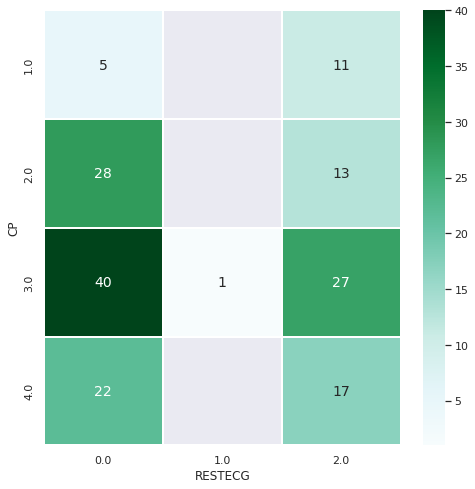

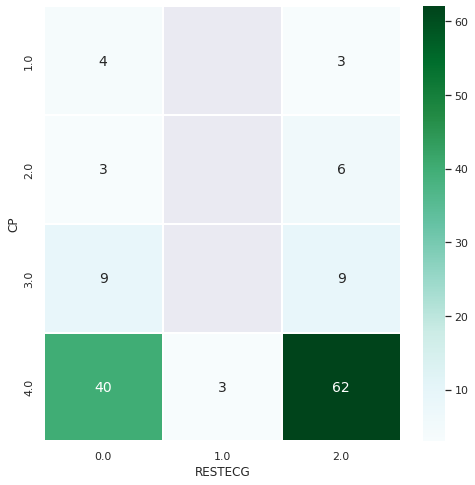

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['CP', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['CP', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS = 0, 
RESTECG=0(normal resting ECG) with CP=3(non-anginal pain) has the highest count since more people with a normal ECG would not have a heart disease and more people with non-anginal pain would not have heart disease.

For DIS = 1, 
restecg=2 with cp=4 has the greatest count because restecg=2 is an abnormal ecg which indicates heart disease and cp=4 means asymptomatic(no chest pain) but most patients with heart disease in this dataset have been diagnosed with a heart disease without them having chest pain. 


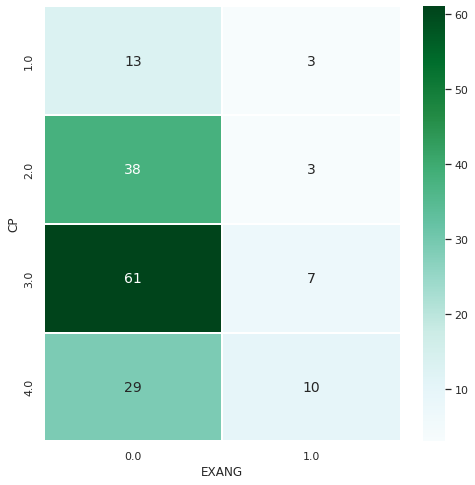

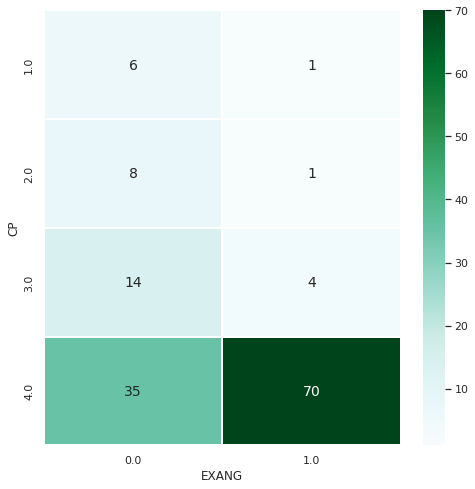

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['CP', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['CP', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0, 

CP=3(non-anginal pain) with EXANG=0(no exercise induced angina) has the greatest count because exercise induced angina is a symptom of heart disease and so those without heart disease would be expected to not have exercise induced angina. Chest pain exeprieced by those without heart disease is non-anginal as anginal pain would indicate a disease relating to the heart's blood vessels. 

For DIS=1,

CP=4(asyptomatic) has the greatest count as in this dataset most heart patients had no chest pain. There are more people with heart disease who had exercise induced angina (EXANG=1). 

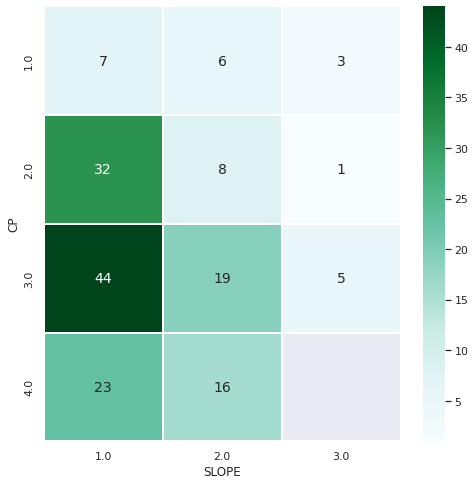

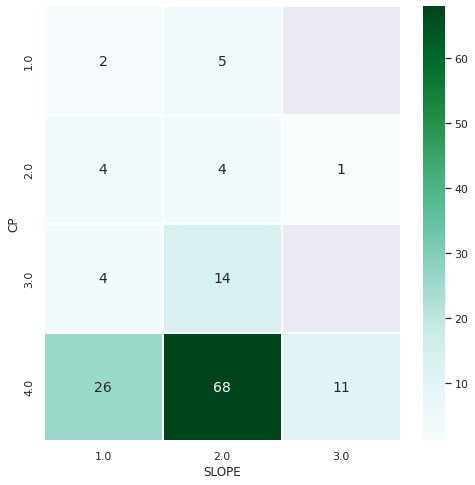

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['CP', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['CP', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0,

CP=3(non-anginal pain) with SLOPE=0(upwards sloping ST-segment which is the normal ecg) has the greatest count because most people without heart disease are expected to have a normal slope and have non-anginal chest pain.

For DIS=1,

CP=4(asyptomatic) has the greatest count as in this dataset most heart patients had no chest pain. There are more people with heart disease who had SLOPE=2 than SLOPE=3 eventhough both are abnormal ECGs


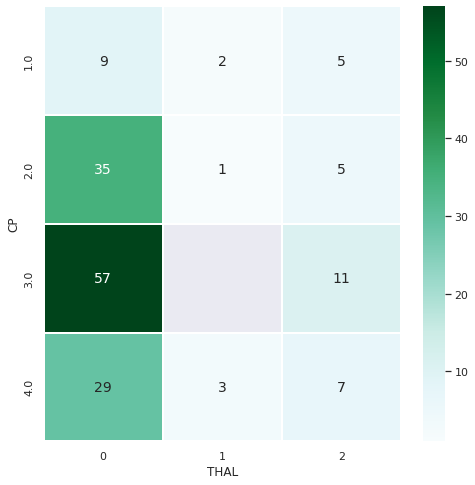

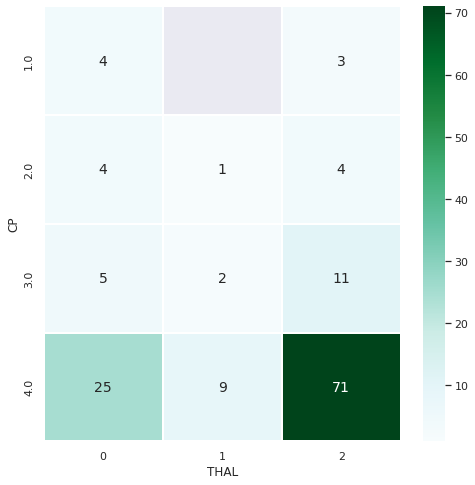

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['CP', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['CP', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS =0, 

most individuals have non-anginal pain(CP=3) and no heart defects(THAL=0).

For DIS=1,

most individuals are asymtomatic(CP=4) and have reversible heart defects(THAL=2)

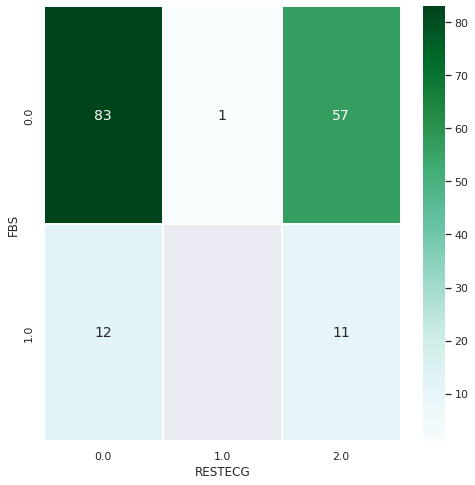

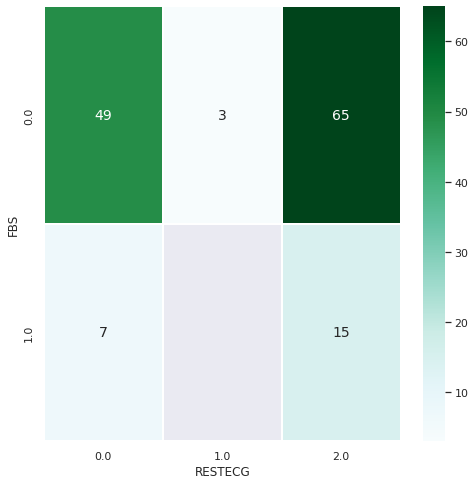

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['FBS', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['FBS', 'RESTECG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0, 

FBS=0(fasting blood sugar within normal range) with RESTECG=0(normal ECG) has the highest count because non-diabetic people have a lower risk of heart disease and those without heart disease would have normal ECGs respectively. 

For DIS =1, 
FBS = 0(fasting blood sugar within normal range) with RESTECG=2(abnormal ECG) is has the highest count. We expected to see more individuals with FBS = 1 under DIS =1 becuase diabtes increase risk of heart disease but the opposite happened in this dataset so it is an anomaly. RESTECG=2 is highest because it indicates an abnormal ECG and heart disease patients would have abnormal ECGs

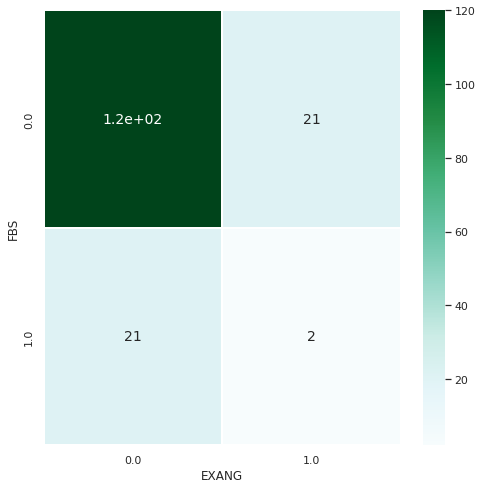

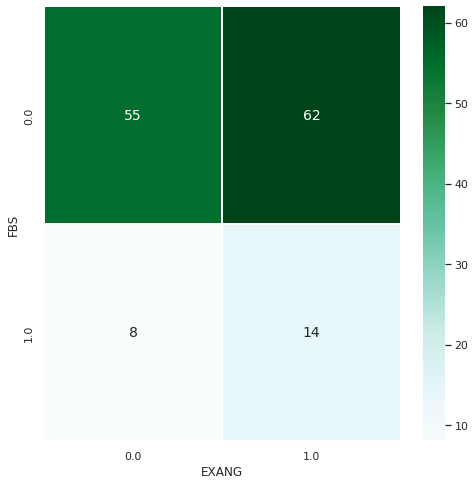

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['FBS', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['FBS', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0(no heart disease), 
most people had fasting blood sugar within normal range(FBS=0) and had no exercise induced angina(EXANG=0)
while for DIS =1(have heart disease), 
most people had fasting blood sugar within normal range(FBS=1) but had exercise induced angina. 

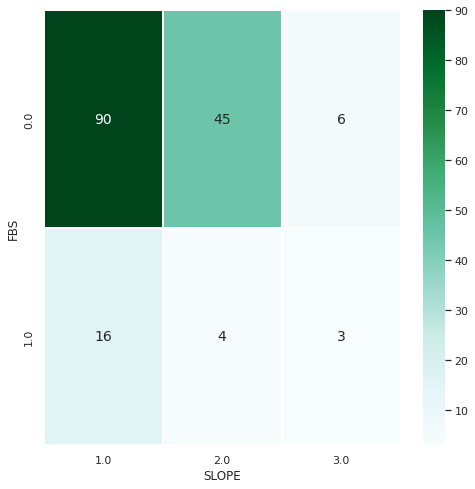

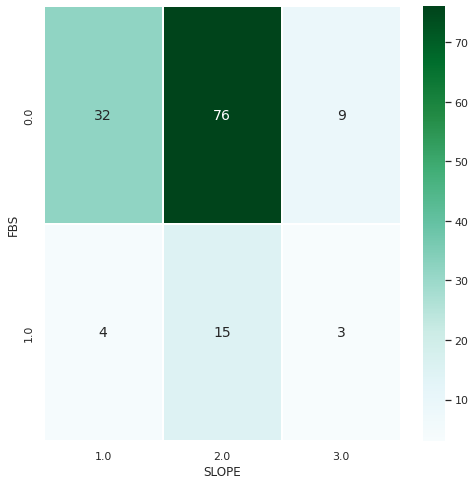

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['FBS', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['FBS', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0, 
most people had a normal fasting blood sugar(FBS=0) and a normal slope for ECG which is an upward slopping ST-segment during exercise(Slope=1) while 

For DIS =1, 
most people had a normal fasting bllod sugar(FBS=0) but has an abnormal slope for ECG which is a flat sloping ST-segment during exercise (SLOPE=2).

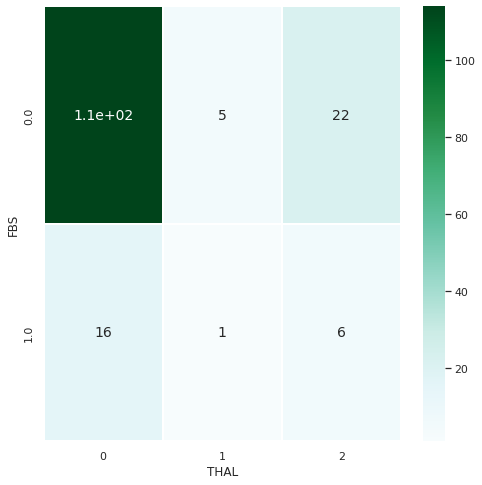

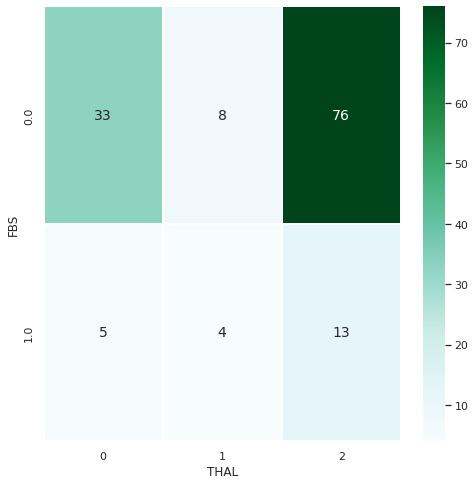

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['FBS', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['FBS', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

For DIS=0, 

most individuals have normal fasting blood sugar(FBS=0) with no heart defects(THAL=0)

For DIS =1,

most individials have normal fasting blood sugar(FBS=0) with reversible heart defects(THAL=2)

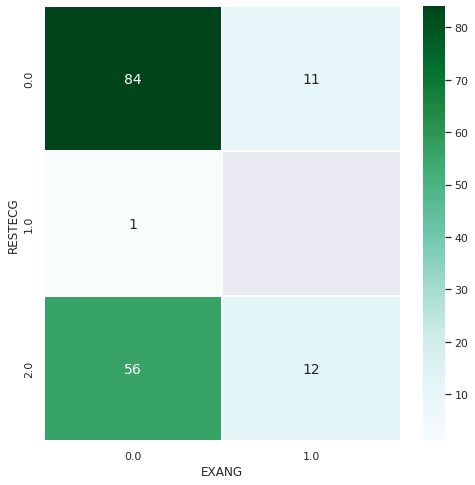

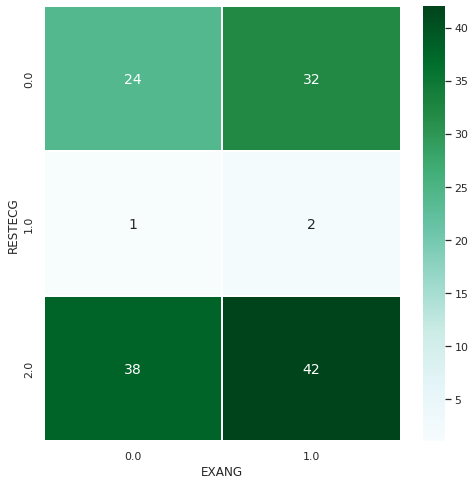

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['RESTECG', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['RESTECG', 'EXANG']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most people without heart disease(DIS=0) had a normal resting ECG(RESTECG=0) and had no exercise induced angina while 

most people with heart disease(DIS=1) had an abnormal resting ECG(RESTECG=2) and had exercise induced angina(EXANG=1)

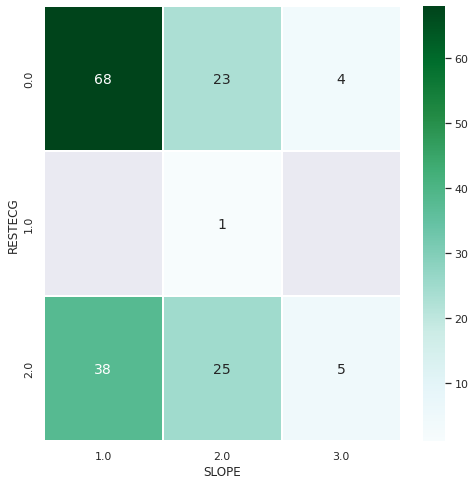

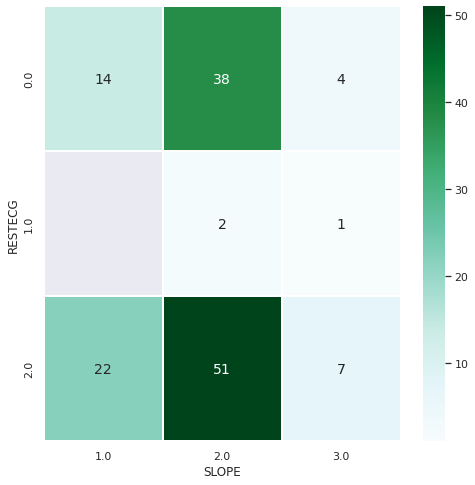

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['RESTECG', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['RESTECG', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most people without heart disease(DIS=0) had a normal slope(SLOPE=1) and a normal resting ECG(RESTECG=0) while 

most people with heart disease(DIS=1) had an abnormal slope(SLOPE=2) and an abnormal resting ECG(RESTECG=2)

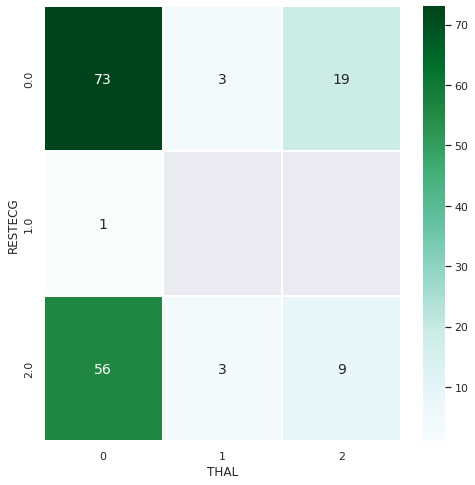

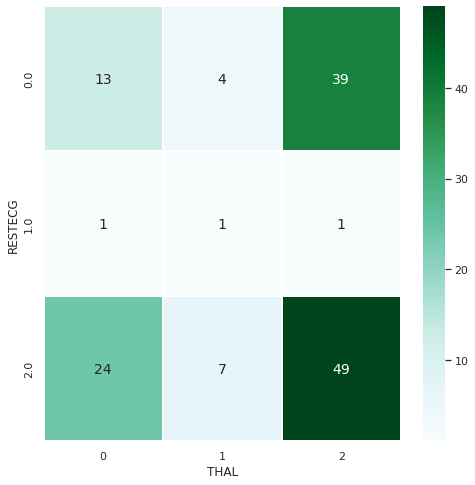

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['RESTECG', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['RESTECG', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most people without heart disease(DIS=0) had a normal resting ecg(RESTECG=1) and no heart defects(THAL=0) while 

most people with heart disease(DIS=1) had an abnormal resting ecg(RESTECG=2) and reversible heart defects(THAL=1)

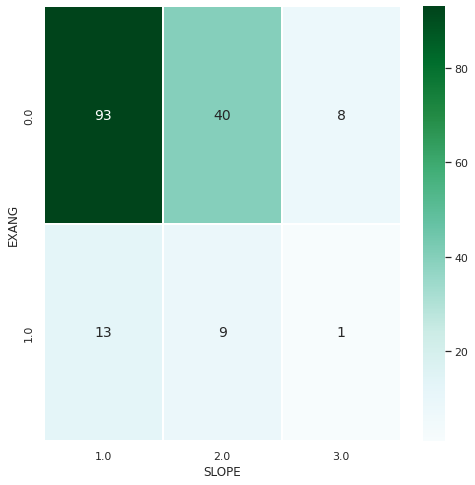

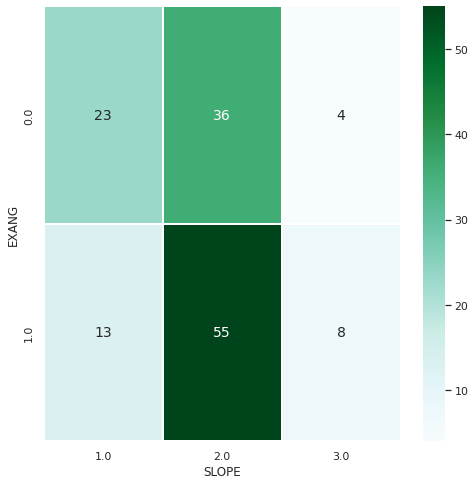

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['EXANG', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['EXANG', 'SLOPE']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most people without heart disease(DIS=0) had no exercise induced angina(EXANG=0) and had a normal slope for ECG(SLOPE=1) while

most people with heart disease(DIS=1) had exercise induced angina(EXANG=1) and an abnormal slope(SLOPE=2).

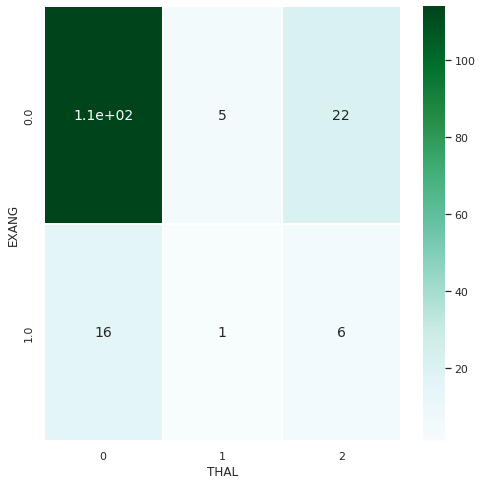

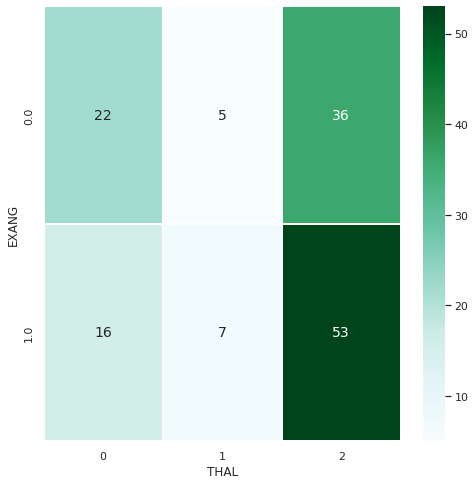

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen1.groupby(['EXANG', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

f = plt.figure(figsize=(8, 8))
sb.heatmap(dualtype_gen2.groupby(['EXANG', 'THAL']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn")

Most people without heart disease(DIS=0) had no exercise induced angina(EXANG=0) and no heart defects(THAL=0) while

most people with heart disease(DIS=1) had exercise induced angina(EXANG=1) and reversible heart defects(THAL=2).